In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, model_selection, svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np
import ipywidgets as widgets

df = pd.read_csv("results.csv", usecols=["player_id", "match_id", "race", "cls", "winner"])
df2 = pd.read_csv("games.csv", usecols=["match_id", "game_type"])
df3 = df2.merge(df, on="match_id")
df_2v2 = df3.loc[df3["game_type"] == "2v2"]
LR = linear_model.LogisticRegression()
le = LabelEncoder()
encoded_df = df_2v2[df_2v2.columns[:]].apply(le.fit_transform)
merged_df = df_2v2.merge(df_2v2, how="inner", on=["match_id", "winner"])
encoded_merged_df = merged_df[merged_df.columns[:]].apply(le.fit_transform)

Accuracy score:  50.54924108718672 %


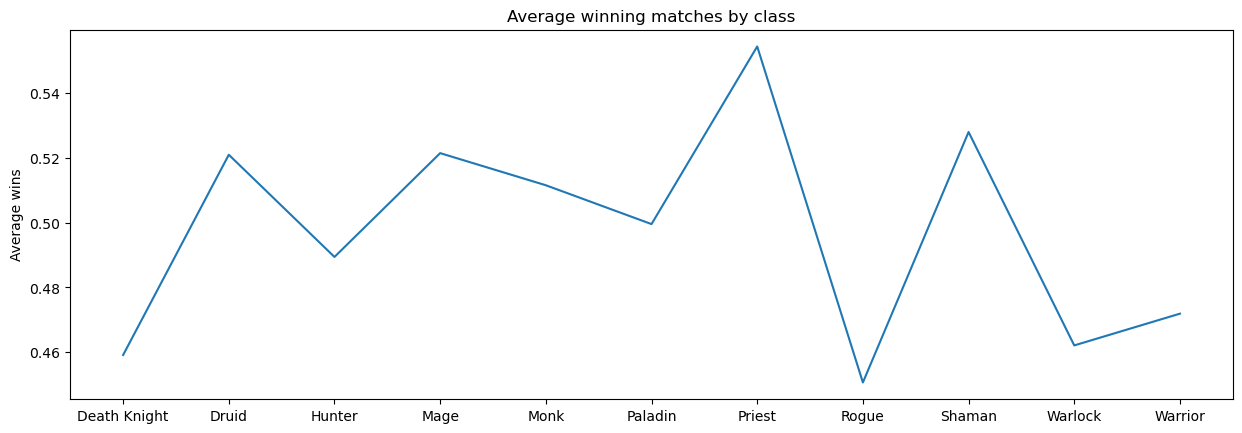

In [57]:
def cls_wins(cls):
    cls_no = df_2v2[df_2v2["cls"] == cls]
    cls_count = df_2v2["cls"].value_counts()[cls]
    cls_win_avg = (cls_no["winner"].value_counts()[True]) / cls_count
    return cls_win_avg

x = list(range(0, 11))
y = cls_wins("death knight"), cls_wins("druid"), cls_wins("hunter"), cls_wins("mage"), cls_wins("monk"), cls_wins("paladin"), cls_wins("priest"), cls_wins("rogue"), cls_wins("shaman"), cls_wins("warlock"), cls_wins("warrior") 

plt.figure().set_figwidth(15)
plt.title("Average winning matches by class")
plt.xticks((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10), ("Death Knight", "Druid", "Hunter", "Mage", "Monk", "Paladin", "Priest", "Rogue", "Shaman", "Warlock", "Warrior"))
plt.ylabel("Average wins")
plt.plot(x, y)

y = encoded_df["winner"]
X = encoded_df[["cls"]]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2)
LR.fit(X_train, y_train)

preds_valid=LR.predict(X_valid)
class_score_valid=metrics.accuracy_score(y_valid,preds_valid) * 100
print("Accuracy score: ", class_score_valid, "%")

Accuracy score:  51.786798446876105 %


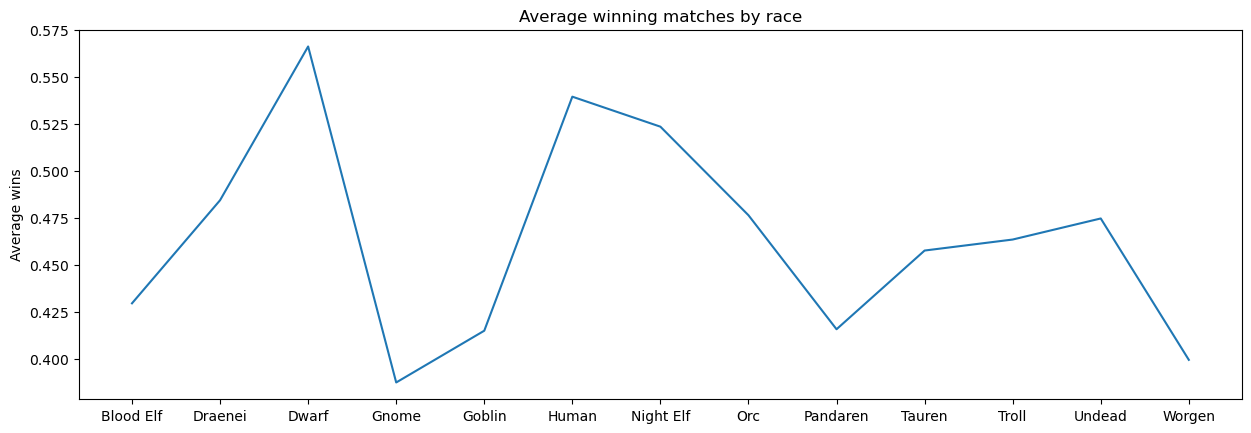

In [59]:
def race_wins(race):
    race_no = df_2v2[df_2v2["race"] == race]
    race_count = df_2v2["race"].value_counts()[race]
    race_win_avg = (race_no["winner"].value_counts()[True]) / race_count
    return race_win_avg

x = list(range(0, 13))
y = race_wins("blood elf"), race_wins("draenei"), race_wins("dwarf"), race_wins("gnome"), race_wins("goblin"), race_wins("human"), race_wins("night elf"), race_wins("orc"), race_wins("pandaren"), race_wins("tauren"), race_wins("troll"), race_wins("undead"), race_wins("worgen")  

plt.figure().set_figwidth(15)
plt.title("Average winning matches by race")
plt.xticks((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), ("Blood Elf", "Draenei", "Dwarf", "Gnome", "Goblin", "Human", "Night Elf", "Orc", "Pandaren", "Tauren", "Troll", "Undead", "Worgen"))
plt.ylabel("Average wins")
plt.plot(x, y)

y = encoded_df["winner"]
X = encoded_df[["race"]]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2)
LR.fit(X_train, y_train)

preds_valid=LR.predict(X_valid)
race_score_valid=metrics.accuracy_score(y_valid,preds_valid) * 100
print("Accuracy score: ", race_score_valid, "%")

In [61]:
y = encoded_merged_df["winner"]
X = encoded_merged_df[["race_x", "race_y"]]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2)
LR.fit(X_train, y_train)

preds_valid=LR.predict(X_valid)
combined_race_score_valid=metrics.accuracy_score(y_valid,preds_valid) * 100
print("Accuracy score: ", combined_race_score_valid, "%")

Accuracy score:  51.978981703421034 %


In [63]:
y = encoded_merged_df["winner"]
X = encoded_merged_df[["cls_x", "cls_y"]]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2)
LR.fit(X_train, y_train)

preds_valid=LR.predict(X_valid)
combined_class_score_valid=metrics.accuracy_score(y_valid,preds_valid) * 100
print("Accuracy score: ", combined_class_score_valid, "%")

Accuracy score:  50.90512113584936 %


In [65]:
y = encoded_merged_df["winner"]
X = encoded_merged_df[["race_x", "race_y", "cls_x", "cls_y"]]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2)
LR.fit(X_train, y_train)

preds_valid=LR.predict(X_valid)
combined_race_class_score_valid=metrics.accuracy_score(y_valid,preds_valid) * 100
print("Accuracy Score: ", combined_race_class_score_valid, "%")

Accuracy Score:  51.870254203482816 %


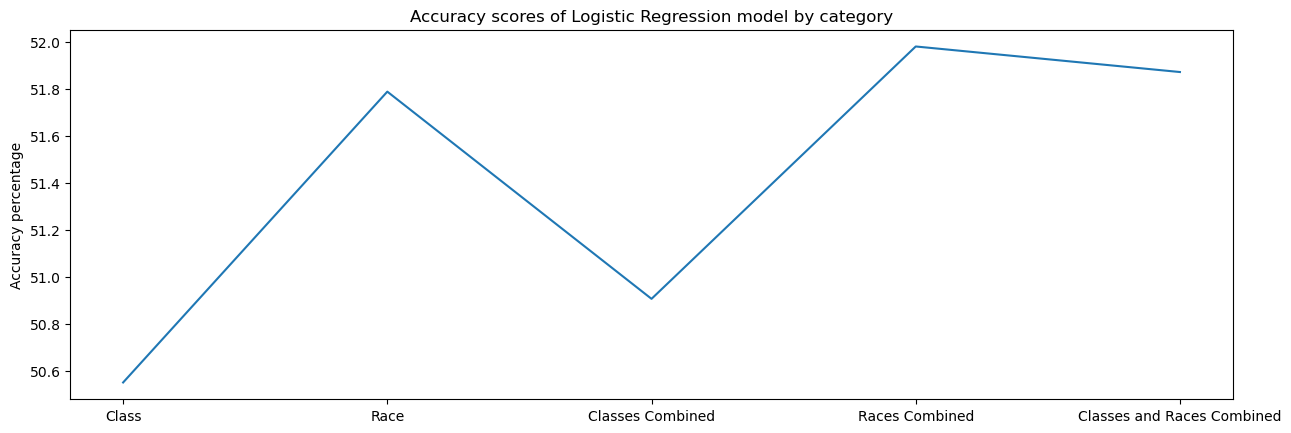

In [67]:
x = list(range(0, 5))
y = class_score_valid, race_score_valid, combined_class_score_valid, combined_race_score_valid, combined_race_class_score_valid

plt.figure().set_figwidth(15)
plt.title("Accuracy scores of Logistic Regression model by category")
plt.xticks((0, 1, 2, 3, 4), ("Class", "Race", "Classes Combined", "Races Combined", "Classes and Races Combined"))
plt.ylabel("Accuracy percentage")
plt.plot(x, y)

In [69]:
y = encoded_merged_df["winner"]
X = encoded_merged_df[["race_x", "race_y"]]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2)
LR.fit(X_train.values, y_train)

def avg_race_wins(race):
    race_no = encoded_df[encoded_df["race"] == race]
    race_count = encoded_df["race"].value_counts()[race]
    race_win_avg = (race_no["winner"].value_counts()[1]) / race_count
    return race_win_avg

def predict_winner(Team1Race1, Team1Race2, Team2Race1, Team2Race2):
    team_1_result = LR.predict([[Team1Race1, Team1Race2]])
    team_2_result = LR.predict([[Team2Race1, Team2Race2]])
    if (team_1_result > team_2_result):
        print("Team 1 will win")
    elif (team_1_result < team_2_result):
        print("Team 2 will win")
    else:
        if ((avg_race_wins(Team1Race1)) + (avg_race_wins(Team1Race2))) > ((avg_race_wins(Team2Race1)) + (avg_race_wins(Team2Race2))):
            print("Team 1 will win")
        else:
            print("Team 2 will win")
    return

predict_layout = widgets.interact_manual.options(manual_name="Predict Winner")
predict_layout(predict_winner, Team1Race1=[("Blood Elf", 7), ("Draenei", 3), ("Dwarf", 6), ("Gnome", 8), 
                                                                            ("Goblin", 9), ("Human", 5), ("Night Elf", 11), ("Orc", 10), 
                                                                            ("Pandaren", 12), ("Tauren", 1), ("Troll", 0), ("Undead", 4), 
                                                                            ("Worgen", 2)],
               Team1Race2=[("Blood Elf", 7), ("Draenei", 3), ("Dwarf", 6), ("Gnome", 8), 
                                                                            ("Goblin", 9), ("Human", 5), ("Night Elf", 11), ("Orc", 10), 
                                                                            ("Pandaren", 12), ("Tauren", 1), ("Troll", 0), ("Undead", 4), 
                                                                            ("Worgen", 2)],
               Team2Race1=[("Blood Elf", 7), ("Draenei", 3), ("Dwarf", 6), ("Gnome", 8), 
                                                                            ("Goblin", 9), ("Human", 5), ("Night Elf", 11), ("Orc", 10), 
                                                                            ("Pandaren", 12), ("Tauren", 1), ("Troll", 0), ("Undead", 4), 
                                                                            ("Worgen", 2)],
               Team2Race2=[("Blood Elf", 7), ("Draenei", 3), ("Dwarf", 6), ("Gnome", 8), 
                                                                            ("Goblin", 9), ("Human", 5), ("Night Elf", 11), ("Orc", 10), 
                                                                            ("Pandaren", 12), ("Tauren", 1), ("Troll", 0), ("Undead", 4), 
                                                                            ("Worgen", 2)]
              )
                        


interactive(children=(Dropdown(description='Team1Race1', options=(('Blood Elf', 7), ('Draenei', 3), ('Dwarf', …

<function __main__.predict_winner(Team1Race1, Team1Race2, Team2Race1, Team2Race2)>